In [3]:
import requests # for making standard html requests
from bs4 import BeautifulSoup # magical tool for parsing html data
import json # for parsing data
from pandas import DataFrame as df # premier library for data organization

In [4]:
page = requests.get("https://locations.familydollar.com/id/")
soup = BeautifulSoup(page.text, 'html.parser')

'<!DOCTYPE html>\n<html lang="en">\n\n<head>\n<meta http-equiv="content-type" content="text/html; charset=utf-8">\n\n\n<title>Family Dollar Store Locations in Idaho, ID</title>\n<meta name="viewport" content="width=device-width, initial-scale=1">\n    \n<meta name="description" content="Find your closest Family Dollar Store locations in Idaho. Shop for groceries, housewares, toys, pet supplies, and more. " />\n<meta name="keywords" content="" />\n\t\n<meta name=\'format-detection\' content=\'telephone=no\' />\n\n<link rel="icon" href="//www.familydollar.com/locations/images/favicon.ico"/>\n<link rel="shortcut icon" href="//www.familydollar.com/locations/images/favicon.ico" type="image/x-icon"/>\n\n\n<link rel="canonical" href="https://www.familydollar.com/locations/id/" />\n\n<script type="text/javascript" src="//static.where2getit.com/w2gi/javascript/backbone/bb/lib/jquery.js"></script>\n\n<script type="application/ld+json">\n    {\n      "@context": "http://schema.org",\n      "@type
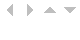

In [5]:
page.text

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <title>
   Family Dollar Store Locations in Idaho, ID
  </title>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="Find your closest Family Dollar Store locations in Idaho. Shop for groceries, housewares, toys, pet supplies, and more. " name="description">
   <meta content="" name="keywords">
    <meta content="telephone=no" name="format-detection"/>
    <link href="//www.familydollar.com/locations/images/favicon.ico" rel="icon"/>
    <link href="//www.familydollar.com/locations/images/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
    <link href="https://www.familydollar.com/locations/id/" rel="canonical"/>
    <script src="//static.where2getit.com/w2gi/javascript/backbone/bb/lib/jquery.js" type="text/javascript">
    </script>
    <script type="application/ld+json">
     {
      "@context": "http://schema.org",
      "@type":
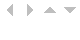

In [6]:
print(soup.prettify())

In [17]:
dollar_tree_list = soup.find_all('href')

In [19]:
dollar_tree_list

[]

In [20]:
dollar_tree_list = soup.find_all(class_ = 'itemlist')
for i in dollar_tree_list[:2]:
  print(i)

<div class="itemlist" data-fl="A"><a class="ga_w2gi_lp" data-gaact="Click_to_CityPage" data-galoc="Aberdeen - ID" dta-linktrack="City index page - Aberdeen" href="https://www.familydollar.com/locations/id/aberdeen/">Aberdeen</a></div>
<div class="itemlist" data-fl="A"><a class="ga_w2gi_lp" data-gaact="Click_to_CityPage" data-galoc="American Falls - ID" dta-linktrack="City index page - American Falls" href="https://www.familydollar.com/locations/id/american-falls/">American Falls</a></div>


In [21]:
type(dollar_tree_list)

bs4.element.ResultSet

In [22]:
len(dollar_tree_list)

49

In [23]:
example = dollar_tree_list[2]

In [24]:
example_content = example.contents
print(example_content)

[<a class="ga_w2gi_lp" data-gaact="Click_to_CityPage" data-galoc="Arco - ID" dta-linktrack="City index page - Arco" href="https://www.familydollar.com/locations/id/arco/">Arco</a>]


In [29]:
example_content = example.contents[0]
example_content.attrs

{'class': ['ga_w2gi_lp'],
 'data-galoc': 'Arco - ID',
 'data-gaact': 'Click_to_CityPage',
 'dta-linktrack': 'City index page - Arco',
 'href': 'https://www.familydollar.com/locations/id/arco/'}

In [30]:
example_href = example_content['href']
print(example_href)

https://www.familydollar.com/locations/id/arco/


In [31]:
city_hrefs = [] # initialise empty list

for i in dollar_tree_list:
    cont = i.contents[0]
    href = cont['href']
    city_hrefs.append(href)

#  check to be sure all went well
for i in city_hrefs[:2]:
  print(i)

https://www.familydollar.com/locations/id/aberdeen/
https://www.familydollar.com/locations/id/american-falls/


In [32]:
city_hrefs

['https://www.familydollar.com/locations/id/aberdeen/',
 'https://www.familydollar.com/locations/id/american-falls/',
 'https://www.familydollar.com/locations/id/arco/',
 'https://www.familydollar.com/locations/id/ashton/',
 'https://www.familydollar.com/locations/id/bellevue/',
 'https://www.familydollar.com/locations/id/blackfoot/',
 'https://www.familydollar.com/locations/id/boise/',
 'https://www.familydollar.com/locations/id/buhl/',
 'https://www.familydollar.com/locations/id/burley/',
 'https://www.familydollar.com/locations/id/caldwell/',
 'https://www.familydollar.com/locations/id/cascade/',
 'https://www.familydollar.com/locations/id/challis/',
 'https://www.familydollar.com/locations/id/chubbuck/',
 'https://www.familydollar.com/locations/id/driggs/',
 'https://www.familydollar.com/locations/id/emmett/',
 'https://www.familydollar.com/locations/id/filer/',
 'https://www.familydollar.com/locations/id/franklin/',
 'https://www.familydollar.com/locations/id/glenns-ferry/',
 'htt

In [35]:
page2 = requests.get(city_hrefs[2])
soup2 = BeautifulSoup(page2.text, 'html.parser')

<!DOCTYPE html>

<html lang="en">
<head>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<title>Family Dollar Store Locations in Arco, ID</title>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="Find nearby Family Dollar Store locations in Arco, ID to shop for groceries, housewares, toys, pet supplies, and more." name="description">
<meta content="" name="keywords">
<link href="//www.familydollar.com/locations/images/favicon.ico" rel="icon"/>
<link href="//www.familydollar.com/locations/images/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<meta content="telephone=no" name="format-detection"/>
<link href="https://www.familydollar.com/locations/id/arco/" rel="canonical"/>
<script type="application/ld+json">
    {
      "@context": "https://schema.org",
      "@type": "BreadcrumbList",
      "itemListElement": [{
        "@type": "ListItem",
        "position": 1,
        "item": {
          "@id": "https://www.familydollar
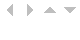

In [39]:
soup2

In [40]:
arco = soup2.find_all(type="application/ld+json")
print(arco[1])

<script type="application/ld+json">
	{
	  "@context":"https://schema.org",
	  "@type":"Schema Business Type",
	  "name": "Family Dollar #9143",
	  "address":{
	    "@type":"PostalAddress",
	    "streetAddress":"157 W Grand Avenue",
	    "addressLocality":"Arco",
	    "addressRegion":"ID",
	    "postalCode":"83213",
	    "addressCountry":"US"
	  },
	  "containedIn":"",  
	  "branchOf": {
	    "name":"Family Dollar",
	    "url": "https://www.familydollar.com/"
	  },
	  "url":"https://www.familydollar.com/locations/id/arco/29143/",
	  "telephone":"208-881-5738",
	  "image": "//hosted.where2getit.com/familydollarstore/images/storefront.png"
	}			
	</script>


In [41]:
arco_contents = arco[1].contents[0]
arco_contents

'\n\t{\n\t  "@context":"https://schema.org",\n\t  "@type":"Schema Business Type",\n\t  "name": "Family Dollar #9143",\n\t  "address":{\n\t    "@type":"PostalAddress",\n\t    "streetAddress":"157 W Grand Avenue",\n\t    "addressLocality":"Arco",\n\t    "addressRegion":"ID",\n\t    "postalCode":"83213",\n\t    "addressCountry":"US"\n\t  },\n\t  "containedIn":"",  \n\t  "branchOf": {\n\t    "name":"Family Dollar",\n\t    "url": "https://www.familydollar.com/"\n\t  },\n\t  "url":"https://www.familydollar.com/locations/id/arco/29143/",\n\t  "telephone":"208-881-5738",\n\t  "image": "//hosted.where2getit.com/familydollarstore/images/storefront.png"\n\t}\t\t\t\n\t'

In [45]:
arco_json =  json.loads(arco_contents)

In [47]:
type(arco_json)

dict

In [48]:
print(arco_json)

{'@context': 'https://schema.org', '@type': 'Schema Business Type', 'name': 'Family Dollar #9143', 'address': {'@type': 'PostalAddress', 'streetAddress': '157 W Grand Avenue', 'addressLocality': 'Arco', 'addressRegion': 'ID', 'postalCode': '83213', 'addressCountry': 'US'}, 'containedIn': '', 'branchOf': {'name': 'Family Dollar', 'url': 'https://www.familydollar.com/'}, 'url': 'https://www.familydollar.com/locations/id/arco/29143/', 'telephone': '208-881-5738', 'image': '//hosted.where2getit.com/familydollarstore/images/storefront.png'}


In [49]:
arco_address = arco_json['address']
arco_address

{'@type': 'PostalAddress',
 'streetAddress': '157 W Grand Avenue',
 'addressLocality': 'Arco',
 'addressRegion': 'ID',
 'postalCode': '83213',
 'addressCountry': 'US'}

In [50]:
city_hrefs

['https://www.familydollar.com/locations/id/aberdeen/',
 'https://www.familydollar.com/locations/id/american-falls/',
 'https://www.familydollar.com/locations/id/arco/',
 'https://www.familydollar.com/locations/id/ashton/',
 'https://www.familydollar.com/locations/id/bellevue/',
 'https://www.familydollar.com/locations/id/blackfoot/',
 'https://www.familydollar.com/locations/id/boise/',
 'https://www.familydollar.com/locations/id/buhl/',
 'https://www.familydollar.com/locations/id/burley/',
 'https://www.familydollar.com/locations/id/caldwell/',
 'https://www.familydollar.com/locations/id/cascade/',
 'https://www.familydollar.com/locations/id/challis/',
 'https://www.familydollar.com/locations/id/chubbuck/',
 'https://www.familydollar.com/locations/id/driggs/',
 'https://www.familydollar.com/locations/id/emmett/',
 'https://www.familydollar.com/locations/id/filer/',
 'https://www.familydollar.com/locations/id/franklin/',
 'https://www.familydollar.com/locations/id/glenns-ferry/',
 'htt

In [51]:
locs_dict = [] # initialise empty list

for link in city_hrefs:
  locpage = requests.get(link)   # request page info
  locsoup = BeautifulSoup(locpage.text, 'html.parser')
      # parse the page's content
  locinfo = locsoup.find_all(type="application/ld+json")
      # extract specific element
  loccont = locinfo[1].contents[0]  
      # get contents from the bs4 element set
  locjson = json.loads(loccont)  # convert to json
  locaddr = locjson['address'] # get address
  locs_dict.append(locaddr) # add address to list

In [54]:
print(locs_dict)

[{'@type': 'PostalAddress', 'streetAddress': '111 N Main Street', 'addressLocality': 'Aberdeen', 'addressRegion': 'ID', 'postalCode': '83210', 'addressCountry': 'US'}, {'@type': 'PostalAddress', 'streetAddress': '253 Harrison St', 'addressLocality': 'American Falls', 'addressRegion': 'ID', 'postalCode': '83211', 'addressCountry': 'US'}, {'@type': 'PostalAddress', 'streetAddress': '157 W Grand Avenue', 'addressLocality': 'Arco', 'addressRegion': 'ID', 'postalCode': '83213', 'addressCountry': 'US'}, {'@type': 'PostalAddress', 'streetAddress': '177 Main Street', 'addressLocality': 'Ashton', 'addressRegion': 'ID', 'postalCode': '83420', 'addressCountry': 'US'}, {'@type': 'PostalAddress', 'streetAddress': '747 N. Main St.', 'addressLocality': 'Bellevue', 'addressRegion': 'ID', 'postalCode': '83313', 'addressCountry': 'US'}, {'@type': 'PostalAddress', 'streetAddress': '67 Sw Main St', 'addressLocality': 'Blackfoot', 'addressRegion': 'ID', 'postalCode': '83221', 'addressCountry': 'US'}, {'@ty

In [55]:
locs_df = df.from_records(locs_dict)
locs_df

,@type,streetAddress,addressLocality,addressRegion,postalCode,addressCountry
0,PostalAddress,111 N Main Street,Aberdeen,ID,83210,US
1,PostalAddress,253 Harrison St,American Falls,ID,83211,US
2,PostalAddress,157 W Grand Avenue,Arco,ID,83213,US
3,PostalAddress,177 Main Street,Ashton,ID,83420,US
4,PostalAddress,747 N. Main St.,Bellevue,ID,83313,US
5,PostalAddress,67 Sw Main St,Blackfoot,ID,83221,US
6,PostalAddress,2901 W State St.,Boise,ID,83702,US
7,PostalAddress,415 Broadway Ave S,Buhl,ID,83316,US
8,PostalAddress,1408 Overland Ave,Burley,ID,83318,US
9,PostalAddress,2402 E Linden St,Caldwell,ID,83605,US


In [56]:
locs_df.drop(['@type', 'addressCountry'], axis = 1, inplace = True)
locs_df.head(n = 5)

,streetAddress,addressLocality,addressRegion,postalCode
0,111 N Main Street,Aberdeen,ID,83210
1,253 Harrison St,American Falls,ID,83211
2,157 W Grand Avenue,Arco,ID,83213
3,177 Main Street,Ashton,ID,83420
4,747 N. Main St.,Bellevue,ID,83313


In [57]:
df.to_csv(locs_df, "family_dollar_ID_locations.csv", sep = ",", index = False)

In [58]:
import os
files = os.listdir(os.curdir)
files

['family_dollar_ID_locations.csv', 'familydollar.ipynb', '.ipynb_checkpoints']

In [61]:
import csv

fd_file = csv.reader("family_dollar_ID_locations.csv")
fd_file

In [74]:
from selenium import webdriver

url = "https://www.walgreens.com/storelistings/storesbycity.jsp?requestType=locator&state=ID"
driver = webdriver.Chrome(executable_path = '/Users/Conlin/Desktop/PlayGround/Data_Analyze/Webscraping/chromedriver')
driver.get(url)
soup_ID = BeautifulSoup(driver.page_source, 'html.parser')
store_link_soup = soup_ID.find_all(class_ = 'col-xl-4 col-lg-4 col-md-4')

In [65]:
import os
files = os.listdir(os.curdir)
files

['family_dollar_ID_locations.csv',
 'familydollar.ipynb',
 '.ipynb_checkpoints',
 'chromedriver']

In [68]:
store_link_soup

[<ul class="col-xl-4 col-lg-4 col-md-4" data-reactid="64"><li data-reactid="65"><a data-reactid="66" href="/storelocator/find.jsp?requestType=locator&amp;state=ID&amp;city=AMMON&amp;from=localSearch" name="AMMON" title="AMMON"><!-- react-text: 67 -->AMMON<!-- /react-text --><!-- react-text: 68 -->, <!-- /react-text --><!-- react-text: 69 -->ID<!-- /react-text --></a></li></ul>,
 <ul class="col-xl-4 col-lg-4 col-md-4" data-reactid="75"><li data-reactid="76"><a data-reactid="77" href="/storelocator/find.jsp?requestType=locator&amp;state=ID&amp;city=BLACKFOOT&amp;from=localSearch" name="BLACKFOOT" title="BLACKFOOT"><!-- react-text: 78 -->BLACKFOOT<!-- /react-text --><!-- react-text: 79 -->, <!-- /react-text --><!-- react-text: 80 -->ID<!-- /react-text --></a></li></ul>,
 <ul class="col-xl-4 col-lg-4 col-md-4" data-reactid="81"><li data-reactid="82"><a data-reactid="83" href="/storelocator/find.jsp?requestType=locator&amp;state=ID&amp;city=BOISE&amp;from=localSearch" name="BOISE" title="BO

In [ ]:
import requests
from bs4 import BeautifulSoup
import json
from pandas import DataFrame as df

page = requests.get("https://www.familydollar.com/locations/")
soup = BeautifulSoup(page.text, 'html.parser')

# find all state links
state_list = soup.find_all(class_ = 'itemlist')

state_links = []

for i in state_list:
    cont = i.contents[0]
    attr = cont.attrs
    hrefs = attr['href']
    state_links.append(hrefs)

# find all city links
city_links = []

for link in state_links:
    page = requests.get(link)
    soup = BeautifulSoup(page.text, 'html.parser')
    familydollar_list = soup.find_all(class_ = 'itemlist')
    for store in familydollar_list:
        cont = store.contents[0]
        attr = cont.attrs
        city_hrefs = attr['href']
        city_links.append(city_hrefs)
# to get individual store links
store_links = []

for link in city_links:
    locpage = requests.get(link)
    locsoup = BeautifulSoup(locpage.text, 'html.parser')
    locinfo = locsoup.find_all(type="application/ld+json")
    for i in locinfo:
        loccont = i.contents[0]
        locjson = json.loads(loccont)
        try:
            store_url = locjson['url']
            store_links.append(store_url)
        except:
            pass

# get address and geolocation information
stores = []

for store in store_links:
    storepage = requests.get(store)
    storesoup = BeautifulSoup(storepage.text, 'html.parser')
    storeinfo = storesoup.find_all(type="application/ld+json")
    for i in storeinfo:
        storecont = i.contents[0]
        storejson = json.loads(storecont)
        try:
            store_addr = storejson['address']
            store_addr.update(storejson['geo'])
            stores.append(store_addr)
        except:
            pass

# final data parsing
stores_df = df.from_records(stores)
stores_df.drop(['@type', 'addressCountry'], axis = 1, inplace = True)
stores_df['Store'] = "Family Dollar"

df.to_csv(stores_df, "family_dollar_locations.csv", sep = ",", index = False)

In [ ]:
state_list

In [ ]:
state_links